In [4]:
import random as rand
import matplotlib.pyplot as plt
import numpy as np

In [5]:
class Neuroid:
    def __init__(self, umbr, beta, kr, maxcount, t, log=False):
        self.log = log

        self.umbr = umbr
        self.beta = beta
        self.kr = kr
        self.maxcount = maxcount
        self.t = t

        self.count1 = 0
        self.count2 = 0

        self.y = 0
        self.nt_out = 0
        self.time = 0

        self.sum_stream = []
        self.count1_stream = []
        self.count2_stream = []
        self.y_stream = []
        self.nt_out_stream = []

    def run_comparator(self, inputs, weights):
        input_sum = round(sum(inputs), 3)
        
        if input_sum > self.umbr:
            if self.count1 > self.beta / (input_sum - self.umbr):
                self.count1 = 0
            else:
                self.count1 += 1
        else:
            self.count1 = 0
        
        
        
        if self.log:
            self.sum_stream.append(input_sum)
            self.count1_stream.append(self.count1)
    
    def run_freq_modulator(self):
        if self.count1 == 1:
            self.y = 1
        else:
            self.y = 0

        if self.log:
            self.y_stream.append(self.y)

    def run_freq_demodulator(self):
        if self.y == 1:
            self.nt_out = self.kr / self.count2
            self.count2 = 0
        else:
            self.count2 += 1

        if self.count2 > self.maxcount:
            self.nt_out = 0

        self.nt_out_stream.append(self.nt_out)

        if self.log:
            self.count2_stream.append(self.count2)

    def get_axon_signal(self, inputs, weights):
        if len(inputs) != len(weights):
            raise Exception("Size of inputs and size of weights must be the same!")
        y_t = []
        for i in range(len(weights) - self.t + 1):
            self.run_comparator(inputs[i:(i + self.t)], weights[i:(i + self.t)])
            self.run_freq_modulator()
            y_t.append(self.y)
        return y_t
    
    def run_neuroid(self, inputs, weights):
        if len(inputs) != len(weights):
            raise Exception("Size of inputs and size of weights must be the same!")
        for i in range(len(weights) - self.t + 1):
            self.run_comparator(inputs[i:(i + self.t)], weights[i:(i + self.t)])
            self.run_freq_modulator()
            self.run_freq_demodulator()
            self.time += 1

            if self.log:
                print("======= Time", self.time, "=======")
                print("nt_out =", self.nt_out)
                print("y =", self.y)
                print("count1 =", self.count1)
                print("count2 =", self.count2)
                print()
        return self.nt_out_stream

def run(umbr, beta, kr, maxcount, log=False):
    inputs = [round(i / 1000, 3)for i in range(1001)] + [round(i / 1000, 3) for i in reversed(range(1000))]
    weights = [0 for i in range(2001)]

    neuroid = Neuroid(umbr=umbr, beta=beta, kr=kr, maxcount=maxcount, t=1, log=log)
    neuroid.run_neuroid(inputs, weights)

    return {"output": neuroid.nt_out_stream}

def use_prev_output(output, umbr, beta, kr, maxcount, log=False):
    inputs = output
    weights = [0 for i in range(2001)]

    neuroid = Neuroid(umbr=umbr, beta=beta, kr=kr, maxcount=maxcount, t=1, log=log)
    neuroid.run_neuroid(inputs, weights)

    return {"output": neuroid.nt_out_stream}

# Combined Neuroid Grouping 1 follows this pattern: 

![neuroid diagram](combined_configuration1.png "Neuroid Diagram")

### All neuroids in this simulation have the same values for all parameters

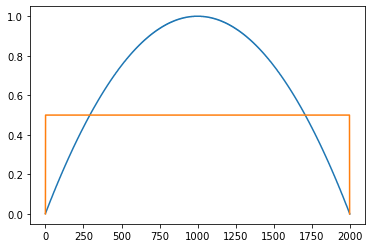

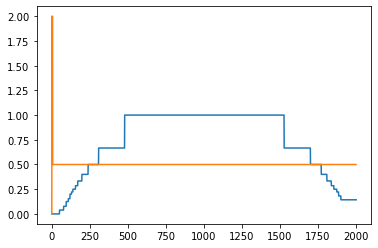

In [12]:
inputs_arc = [1-round(i**2 / 1000**2, 3) for i in reversed(range(1000))] + [1-round(i**2 /1000**2, 3) for i in range(1001)]
ran = len(inputs_arc)
inputs_flat = [0 for i in range(1)] + [0.5 for i in range(int(ran/2) - 1)] + [0.5 for i in range(int(ran/2) - 1)] + [0 for i in range(1)]

weights1 = [0 for i in range(len(inputs_arc))]
weights2 = [0 for i in range(len(inputs_flat))]

plt.plot(inputs_arc)
plt.plot(inputs_flat)
plt.show()

x1 = Neuroid(umbr=0.1, beta=1.25, kr=2, maxcount=100, t=1)
x2 = Neuroid(umbr=0.1, beta=1.25, kr=2, maxcount=100, t=1)
y1 = x1.run_neuroid(inputs= inputs_arc, weights = weights1)
y2 = x2.run_neuroid(inputs= inputs_flat, weights = weights2)

plt.plot(y1)
plt.plot(y2)
plt.show()

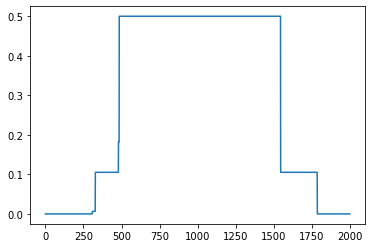

In [13]:
x3 = Neuroid(umbr=0.1, beta=1.25, kr=2, maxcount=100, t=1)
inputs_combined = [x-y for x,y in zip(y1,y2)]
weights3 = [0 for i in range(len(inputs_combined))]
y3 = x3.run_neuroid(inputs=inputs_combined, weights=weights3)

plt.plot(y3)
plt.show()

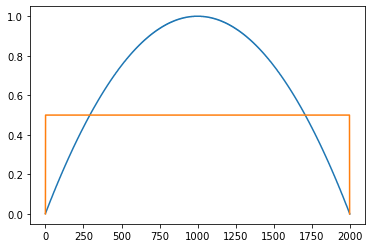

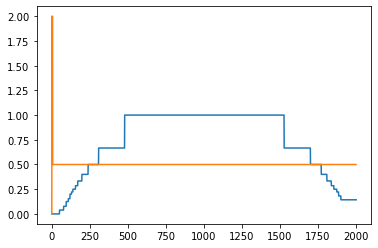

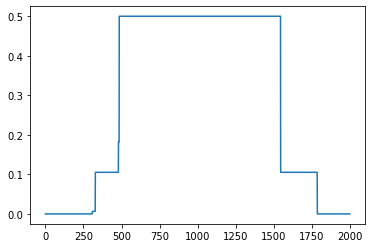

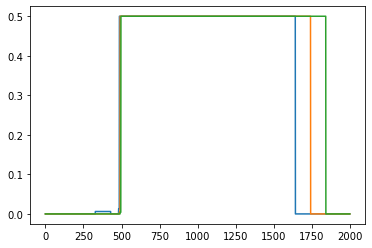

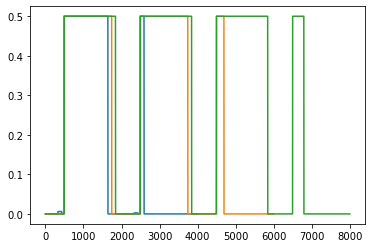

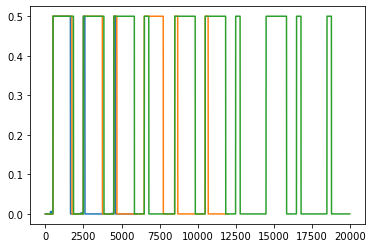

In [16]:
inputs_arc = [1-round(i**2 / 1000**2, 3) for i in reversed(range(1000))] + [1-round(i**2 /1000**2, 3) for i in range(1001)]
ran = len(inputs_arc)
inputs_flat = [0 for i in range(1)] + [0.5 for i in range(int(ran/2) - 1)] + [0.5 for i in range(int(ran/2) - 1)] + [0 for i in range(1)]

weights1 = [0 for i in range(len(inputs_arc))]
weights2 = [0 for i in range(len(inputs_flat))]

plt.plot(inputs_arc)
plt.plot(inputs_flat)
plt.show()

x1 = Neuroid(umbr=0.1, beta=1.25, kr=2, maxcount=100, t=1)
x2 = Neuroid(umbr=0.1, beta=1.25, kr=2, maxcount=100, t=1)
y1 = x1.run_neuroid(inputs= inputs_arc, weights = weights1)
y2 = x2.run_neuroid(inputs= inputs_flat, weights = weights2)

plt.plot(y1)
plt.plot(y2)
plt.show()

x3 = Neuroid(umbr=0.1, beta=1.25, kr=2, maxcount=100, t=1)
inputs_combined = [x-y for x,y in zip(y1,y2)]
weights3 = [0 for i in range(len(inputs_combined))]
y3 = x3.run_neuroid(inputs=inputs_combined, weights=weights3)

plt.plot(y3)
plt.show()

x4 = Neuroid(umbr=0.1, beta=1.25, kr=2, maxcount=100, t=1)
x5 = Neuroid(umbr=0.1, beta=1.25, kr=2, maxcount=100, t=1)
x6 = Neuroid(umbr=0.1, beta=1.25, kr=2, maxcount=100, t=1)

inputs = y3
inputs_maintained = y3
weights = [0 for b in range(len(y3))]
for h in range(0, 3):
    
    y4 = x4.run_neuroid(inputs=inputs, weights=weights)

    weights_5 = [0 for b in range(len(y4))]

    y5 = x5.run_neuroid(inputs=y4, weights=weights_5)

    weights_6 = [0 for b in range(len(y5))]

    y6 = x6.run_neuroid(inputs=y5, weights=weights_6)

    inputs = [x - y for (x, y) in zip(inputs_maintained, y6)]
    weights = [0 for b in range(len(inputs))]
    plt.plot(y4)
    plt.plot(y5)
    plt.plot(y6)
    plt.show()

### Here, we will try a sine-wave input

In [35]:
inputs_arc = np.arange(0, 1300, 0.1)
inputs_arc = [np.sin(i) for i in inputs_arc]
ran = len(inputs_arc)
#print(ran)
inputs_flat = [0 for i in range(1)] + [0.5 for i in range(int(ran/2) - 1)] + [0.5 for i in range(int(ran/2) - 1)] + [0 for i in range(1)]

In [36]:
weights1 = [0 for i in range(len(inputs_arc))]
weights2 = [0 for i in range(len(inputs_flat))]

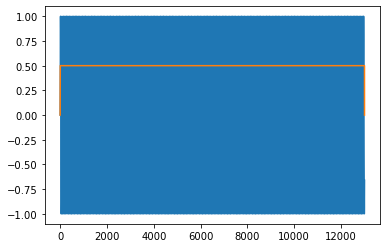

In [37]:
plt.plot(inputs_arc)
plt.plot(inputs_flat)
plt.show()

In [38]:
x1 = Neuroid(umbr=0.1, beta=1.25, kr=2, maxcount=100, t=1)
x2 = Neuroid(umbr=0.1, beta=1.25, kr=2, maxcount=100, t=1)
y1 = x1.run_neuroid(inputs= inputs_arc, weights = weights1)
y2 = x2.run_neuroid(inputs= inputs_flat, weights = weights2)

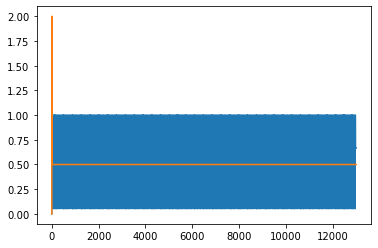

In [39]:
plt.plot(y1)
plt.plot(y2)
plt.show()

In [40]:
x3 = Neuroid(umbr=0.1, beta=1.25, kr=2, maxcount=100, t=1)
inputs_combined = [x-y for x,y in zip(y1,y2)]
weights3 = [0 for i in range(len(inputs_combined))]
y3 = x3.run_neuroid(inputs=inputs_combined, weights=weights3)

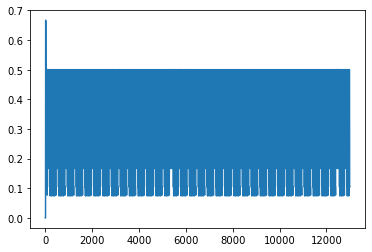

In [41]:
plt.plot(y3)
plt.show()

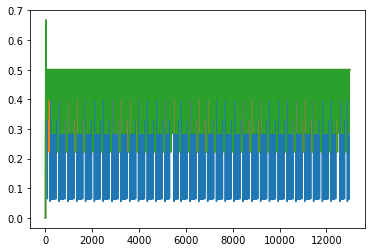

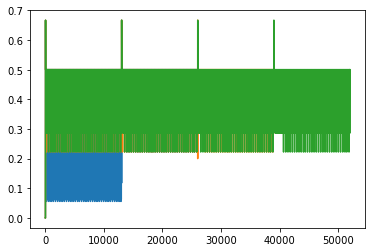

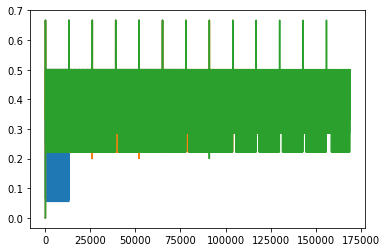

In [42]:
x4 = Neuroid(umbr=0.1, beta=1.25, kr=2, maxcount=100, t=1)
weights4 = [0 for i in range(len(y3))]
y4 = x4.run_neuroid(inputs=y3, weights=weights4)
x5 = Neuroid(umbr=0.1, beta=1.25, kr=2, maxcount=100, t=1)
weights5 = [0 for i in range(len(y4))]
y5 = x5.run_neuroid(inputs=y4, weights=weights5)
x6 = Neuroid(umbr=0.1, beta=1.25, kr=2, maxcount=100, t=1)
weights6 = [0 for i in range(len(y5))]
y6 = x6.run_neuroid(inputs=y5, weights=weights6)

plt.plot(y4)
plt.plot(y5)
plt.plot(y6)
plt.show()

run = 0
while run<2:
    weights4 = [0 for i in range(len(y6))]
    y4 = x4.run_neuroid(inputs=y6, weights=weights4)
    weights5 = [0 for i in range(len(y4))]
    y5 = x5.run_neuroid(inputs=y4, weights=weights5)
    weights6 = [0 for i in range(len(y5))]
    y6 = x6.run_neuroid(inputs=y5, weights=weights6)
    plt.plot(y4)
    plt.plot(y5)
    plt.plot(y6)
    plt.show()
    run += 1

### Here, we will vary the neuroids in pieces of the simulation

In [43]:
inputs_arc = [1-round(i**2 / 1000**2, 3) for i in reversed(range(1000))] + [1-round(i**2 /1000**2, 3) for i in range(1001)]
ran = len(inputs_arc)
inputs_flat = [0 for i in range(1)] + [0.5 for i in range(int(ran/2) - 1)] + [0.5 for i in range(int(ran/2) - 1)] + [0 for i in range(1)]

In [44]:
weights1 = [0 for i in range(len(inputs_arc))]
weights2 = [0 for i in range(len(inputs_flat))]

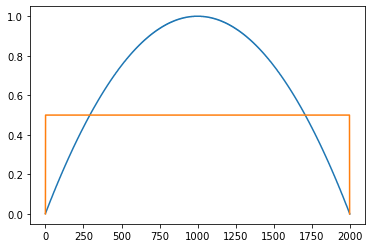

In [45]:
plt.plot(inputs_arc)
plt.plot(inputs_flat)
plt.show()

In [46]:
x1 = Neuroid(umbr=0.1, beta=2.5, kr=2, maxcount=100, t=1)
x2 = Neuroid(umbr=0.1, beta=2.5, kr=2, maxcount=100, t=1)
y1 = x1.run_neuroid(inputs= inputs_arc, weights = weights1)
y2 = x2.run_neuroid(inputs= inputs_flat, weights = weights2)

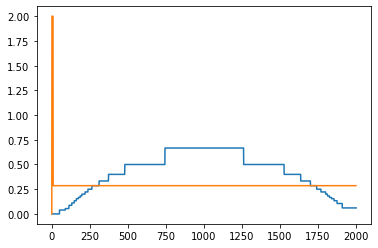

In [47]:
plt.plot(y1)
plt.plot(y2)
plt.show()

In [48]:
x3 = Neuroid(umbr=0.1, beta=1, kr=2, maxcount=100, t=1)
inputs_combined = [x-y for x,y in zip(y1,y2)]
weights3 = [0 for i in range(len(inputs_combined))]
y3 = x3.run_neuroid(inputs=inputs_combined, weights=weights3)

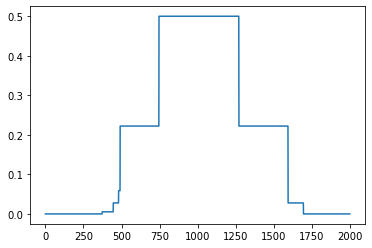

In [49]:
plt.plot(y3)
plt.show()

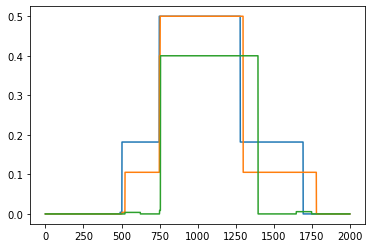

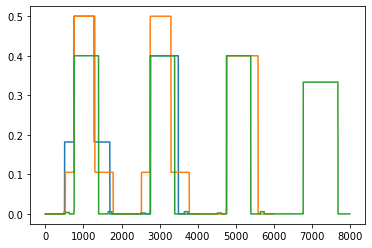

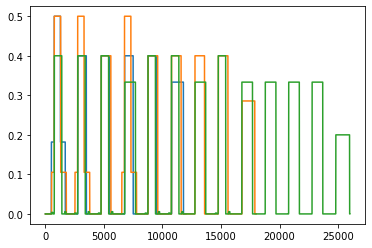

In [50]:
x4 = Neuroid(umbr=0.1, beta=1.25, kr=2, maxcount=100, t=1)
weights4 = [0 for i in range(len(y3))]
y4 = x4.run_neuroid(inputs=y3, weights=weights4)
x5 = Neuroid(umbr=0.1, beta=1.5, kr=2, maxcount=100, t=1)
weights5 = [0 for i in range(len(y4))]
y5 = x5.run_neuroid(inputs=y4, weights=weights5)
x6 = Neuroid(umbr=0.1, beta=1.75, kr=2, maxcount=100, t=1)
weights6 = [0 for i in range(len(y5))]
y6 = x6.run_neuroid(inputs=y5, weights=weights6)

plt.plot(y4)
plt.plot(y5)
plt.plot(y6)
plt.show()

run = 0
while run<2:
    weights4 = [0 for i in range(len(y6))]
    y4 = x4.run_neuroid(inputs=y6, weights=weights4)
    weights5 = [0 for i in range(len(y4))]
    y5 = x5.run_neuroid(inputs=y4, weights=weights5)
    weights6 = [0 for i in range(len(y5))]
    y6 = x6.run_neuroid(inputs=y5, weights=weights6)
    plt.plot(y4)
    plt.plot(y5)
    plt.plot(y6)
    plt.show()
    run += 1